In [15]:
%matplotlib inline
import matplotlib as plt
import torch
import numpy as np
import sys
from ipdb import set_trace

sys.path.append('..')
import d2lzh_pytorch as d2l

In [16]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, labels.size()), dtype=torch.float)

In [17]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
#         set_trace()
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)


In [18]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    # create the dataset
    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    # create optimizer
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch train loss: %d test loss: %d' % (train_ls[-1], test_ls[-1]))
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',\
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight: ', net.weight.data, '\nbias: ', net.bias.data)


final epoch train loss: 0 test loss: 0
weight:  tensor([[ 1.2066, -3.3996,  5.5973]]) 
bias:  tensor([4.9994])


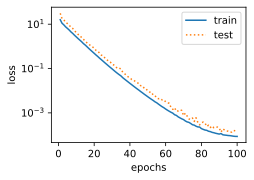

In [6]:
# normal fitting
fit_and_plot(poly_features[:n_train], poly_features[n_train:], labels[:n_train], labels[n_train:])

final epoch train loss: 77 test loss: 253
weight:  tensor([[13.8726]]) 
bias:  tensor([2.9782])


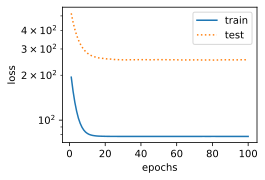

In [7]:
# underfitting (linear)
fit_and_plot(features[:n_train], features[n_train:], labels[:n_train], labels[n_train:])

final epoch train loss: 2 test loss: 2
weight:  tensor([[-0.0537,  0.1052, -0.1437]]) 
bias:  tensor([2.9879])


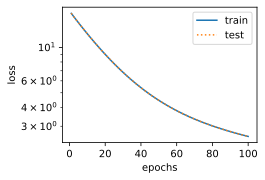

In [19]:
# overfitting (few data)
fit_and_plot(poly_features[0:2], poly_features[0:2], labels[0:2], labels[0:2])